# <center> KNN or K-Nearest Neighbors

# <center> Самый Простой Алгоритм

<center> <img src = '../img/knn.png'>

<center> **KNN decision line**
<center><img src = '../img/kNN.png' width=50%>

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [175]:
plt.style.use('seaborn')

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [177]:
iris_data = load_iris()

In [178]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [179]:
X, y  = iris_data['data'], iris_data['target']

In [180]:
df = pd.DataFrame(X, columns=iris_data['feature_names'])

In [181]:
hash_map = dict(zip(range(3), iris_data['target_names']))

In [182]:
df['target'] = df.assign(target = y).target.map(hash_map)

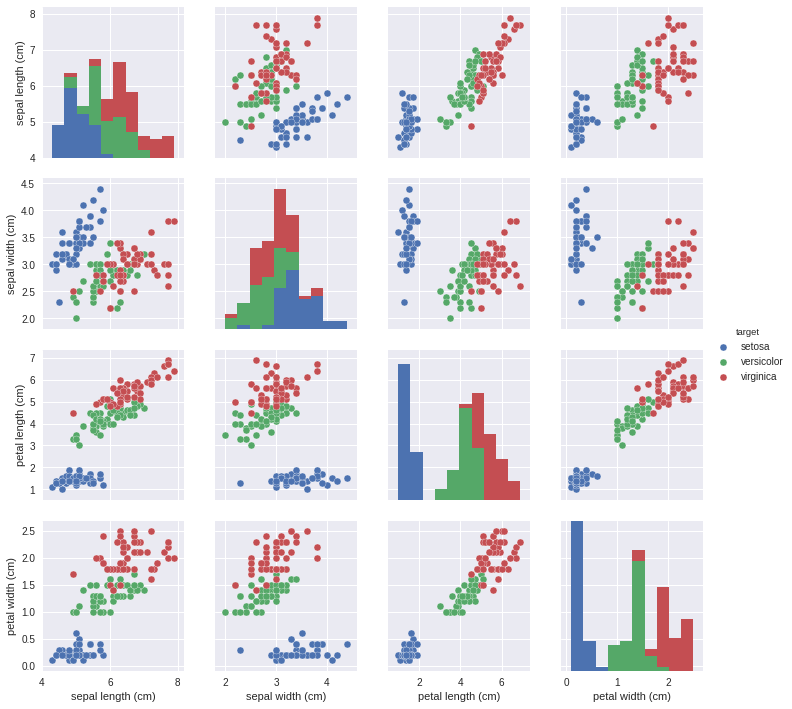

In [183]:
sns.pairplot(df, hue='target');

In [184]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

In [185]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [186]:
knn.score(X, y)

1.0

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [189]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [190]:
knn.score(X_test, y_test)

0.97777777777777775

# <center> Проклятие Размерности

<center> <img src = '../img/homer-doh.jpg' width=40%>

<center> <img src = '../img/Curse+of+Dimensionality.jpg' width=50%>

# <center> Снижение размерности - Principal Component Analysis

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

In [191]:
from sklearn.decomposition import PCA

In [192]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X_art = np.random.multivariate_normal(mean, cov, 300)

/home/dulat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


In [193]:
pca = PCA()
pca.fit(X_art)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [194]:
pca.explained_variance_ratio_

array([ 0.93905057,  0.06094943])

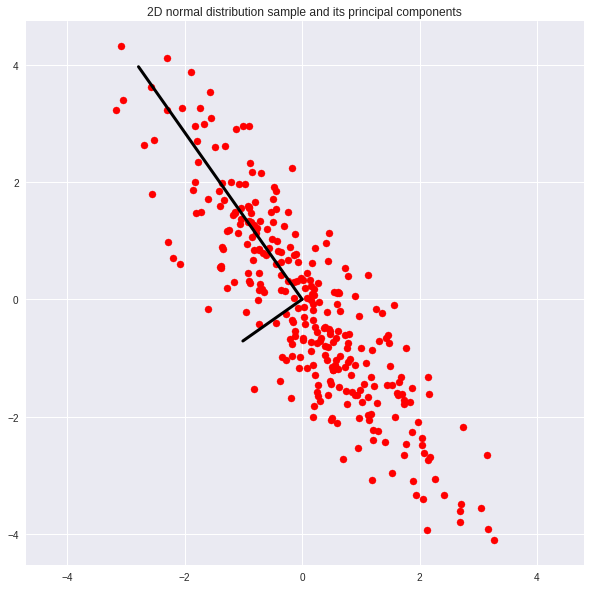

In [195]:
plt.figure(figsize=(10,10))
plt.scatter(X_art[:, 0], X_art[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components');

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

In [196]:
pca = PCA(0.90)
X_art_reduced = pca.fit_transform(X_art)

In [197]:
X_new = pca.inverse_transform(X_art_reduced)

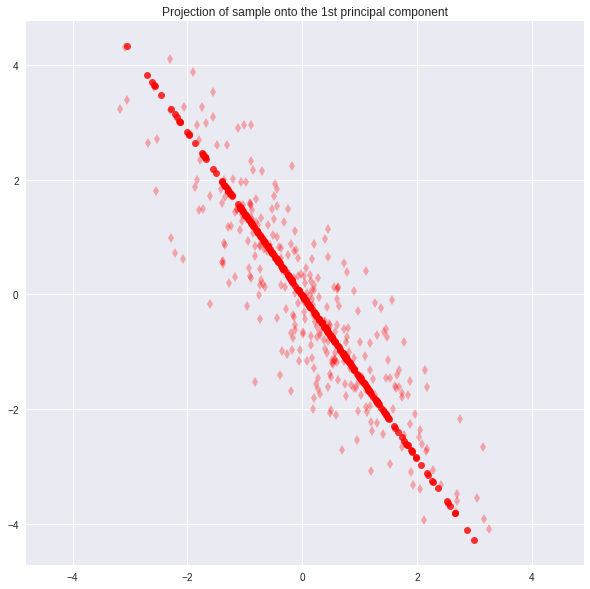

In [198]:
plt.figure(figsize=(10,10))
plt.plot(X_art[:, 0], X_art[:, 1], 'dr', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component');

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

#### Пример с набором данных Iris

In [199]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [200]:
knn = KNeighborsClassifier()
knn.fit(X_reduced, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Plotting the decision boundary.

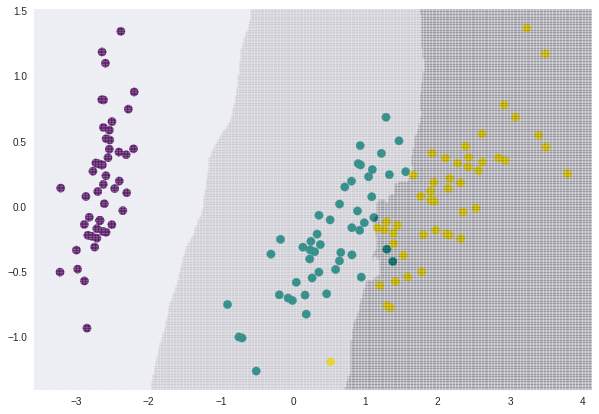

In [201]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, alpha=0.1);

In [202]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [203]:
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("{value:.{digits}f} x {name}".format(value=value, name=name, digits=2)
                     for value, name in zip(component, iris.feature_names)))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.18 x petal length (cm) + -0.07 x petal width (cm)


Выбрать число главных компонент можно по следуещему графику, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент

In [204]:
from sklearn.datasets import load_breast_cancer

In [205]:
data = load_breast_cancer()

In [206]:
cancer_X = data['data']

In [207]:
pca = PCA()
pca.fit(cancer_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [208]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [209]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(cancer_X)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [210]:
pca_variance = pca_scaled.steps[1][1].explained_variance_ratio_

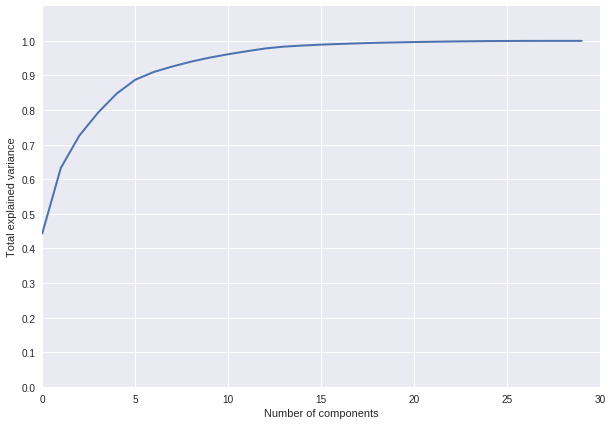

In [211]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_variance), lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 30)
plt.ylim(0.9, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1));


# <center> KMeans

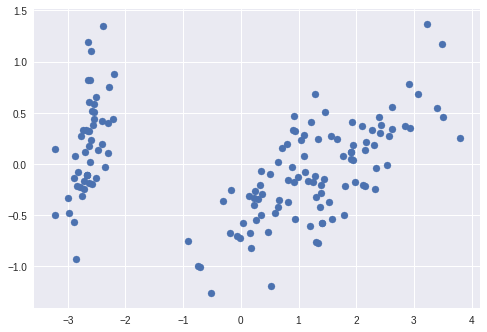

In [213]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1]);

<center> <img src = '../img/kmeans.png'>


### <center> Пример

In [215]:
from sklearn.cluster import KMeans

In [231]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

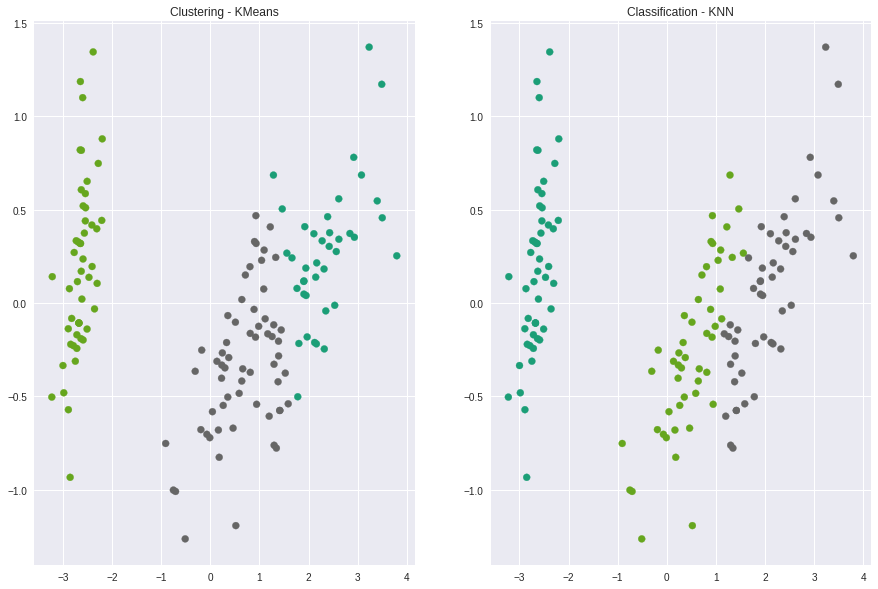

In [232]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='Dark2');
ax[0].set_title('Clustering - KMeans')
ax[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=knn.predict(X_reduced), cmap='Dark2');
ax[1].set_title('Classification - KNN');

In [234]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, kmeans.predict(X_reduced))

0.71634211268384751

In [235]:
adjusted_rand_score(y, knn.predict(X_reduced))

0.94101225629242058

## Сжатие изображений с K-means

In [240]:
import matplotlib.image as mpimg
img = mpimg.imread('../img/spiderman.jpg')[..., 1]

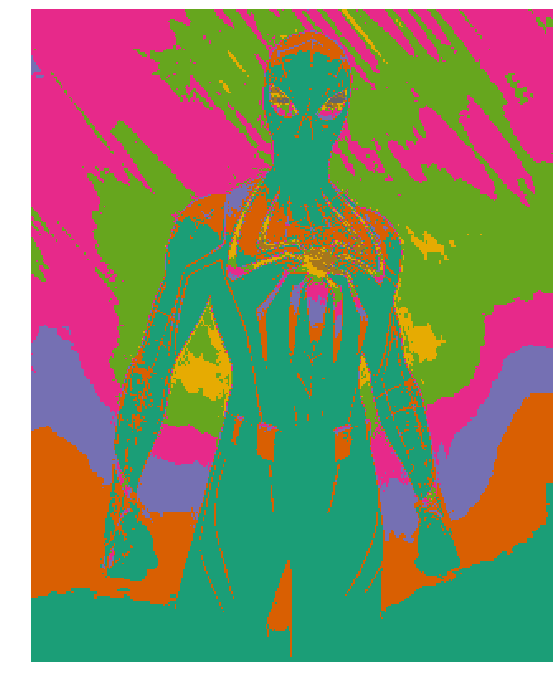

In [244]:
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='Dark2');

In [245]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

In [246]:
img.shape

(395, 316)

In [250]:
img.ravel()[:, np.newaxis]

(124820,)

In [253]:
X = img.ravel()[:, np.newaxis]

In [254]:
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X) 

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [255]:
values = k_means.cluster_centers_
labels = k_means.labels_

In [257]:
values[labels]

array([[ 72.28870648],
       [ 72.28870648],
       [ 72.28870648],
       ..., 
       [ 19.31143079],
       [ 19.31143079],
       [ 19.31143079]])

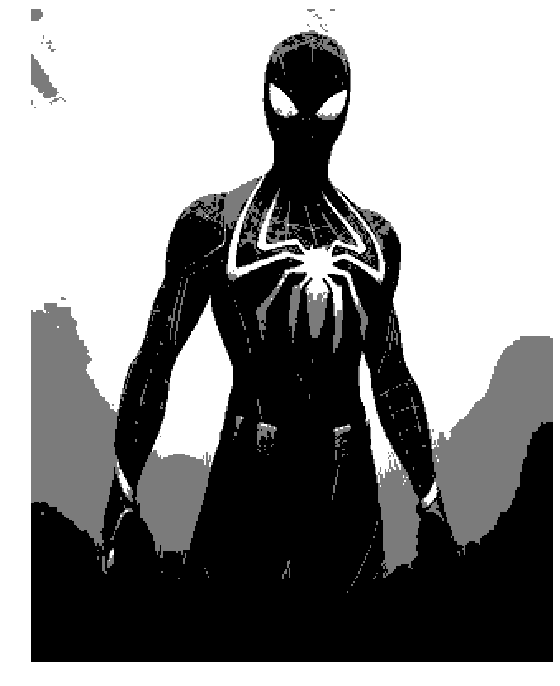

In [252]:
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');